# 5TH SEMESTER MINI PROJECT 
# Forecasting number of orders (Genpact Dataset)
Name: Peeyush Pratap Singh 

Course: B.Tech (C.S.E)

Semester: 5

Section: DS



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading data
dfTrain=pd.read_csv("train.csv")
dfMeal=pd.read_csv("meal_info.csv")
dfFulfilment=pd.read_csv("fulfilment_center_info.csv")

In [3]:
dfTrain.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
dfTrain.isnull().sum() # Checking for null values

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [5]:
dfMeal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
dfMeal.isnull().sum() # Checking for null values

meal_id     0
category    0
cuisine     0
dtype: int64

In [7]:
dfFulfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
dfFulfilment.isnull().sum() # Checking for null values

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [9]:
print('shape of dfTrain: '+str(dfTrain.shape))
print('shape of dfMeal: '+str(dfMeal.shape))
print('shape of dfFulfilment: '+str(dfFulfilment.shape))

shape of dfTrain: (456548, 9)
shape of dfMeal: (51, 3)
shape of dfFulfilment: (77, 5)


In [10]:
dfTrain.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [11]:
dfMeal.dtypes

meal_id      int64
category    object
cuisine     object
dtype: object

In [12]:
dfFulfilment.dtypes

center_id        int64
city_code        int64
region_code      int64
center_type     object
op_area        float64
dtype: object

In [13]:
#Calculating correlation between different features 
corrMatrix =dfTrain.corr()
print(corrMatrix["num_orders"])

id                       0.000702
week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
Name: num_orders, dtype: float64


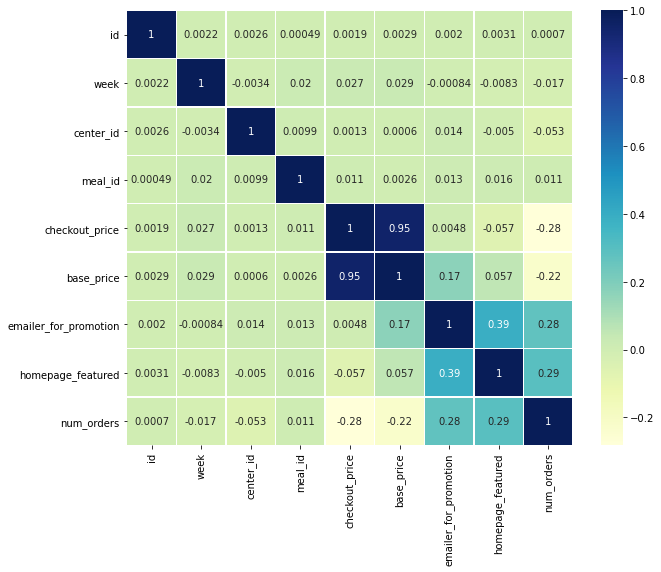

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix,linewidths=0.5,annot=True,cmap="YlGnBu")

In [15]:
print(set(dfTrain['week']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145}


In [16]:
uniQTMid=set(dfTrain['meal_id']) #extracting unique meal_id from dfTrain dataframe
uniQMMid=set(dfMeal['meal_id']) #extracting unique meal_id from dfTrain dataframe
print("Number of unique meal_id in train.csv: "+str(len(uniQTMid)))
print("Number of unique meal_id in meal.csv: "+str(len(uniQMMid)))
print("Common unique meal_id in train and meal csv: "+str(len(uniQTMid.intersection(uniQMMid))))

Number of unique meal_id in train.csv: 51
Number of unique meal_id in meal.csv: 51
Common unique meal_id in train and meal csv: 51


Meal_id can be used as column to merge dfTrain and dfMeal

In [17]:
uniQTCid=set(dfTrain['center_id'])
uniQFCid=set(dfFulfilment['center_id'])
print("Number of unique center_id in train.csv: "+str(len(uniQTCid)))
print("Number of unique center_id in fulfilment.csv "+str(len(uniQFCid)))
print("Common unique center_id in train and fulfilment csv: "+str(len(uniQTCid.intersection(uniQFCid))))

Number of unique center_id in train.csv: 77
Number of unique center_id in fulfilment.csv 77
Common unique center_id in train and fulfilment csv: 77


Center_id can be used as column to merge dfTrain and dfFulfilment

In [18]:
dfTest=pd.read_csv("test.csv")
dfTest.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [19]:
print(set(dfTest['week']))

{146, 147, 148, 149, 150, 151, 152, 153, 154, 155}


In [20]:
dfTest.shape

(32573, 8)

Merging Test and Train dataset with meal and fulfilment dataset

In [21]:
X=pd.merge(dfTrain,dfMeal[['meal_id','category','cuisine']],on='meal_id')
X=pd.merge(X,dfFulfilment[['center_id','city_code','region_code','center_type','op_area']],on='center_id')
X.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [22]:
dfGroupWeek=dfTrain.groupby(['week'])

In [23]:
mean_numorder=[] #list to store the mean of number of order per week
total_order=[] #list to store the total order per week
for i in range(1,146):
    dfTemp=dfGroupWeek.get_group(i)
    dfTemp.index=list(range(0,dfTemp.shape[0]))
    tempsum=0
    for j in range(0,dfTemp.shape[0]):
        tempsum=tempsum+dfTemp.loc[j,'num_orders']
    mean_numorder.append(tempsum/dfTemp.shape[0])
    total_order.append(tempsum)
# print(mean_numorder)

Text(0.5, 1.0, 'Average orders per weeks')

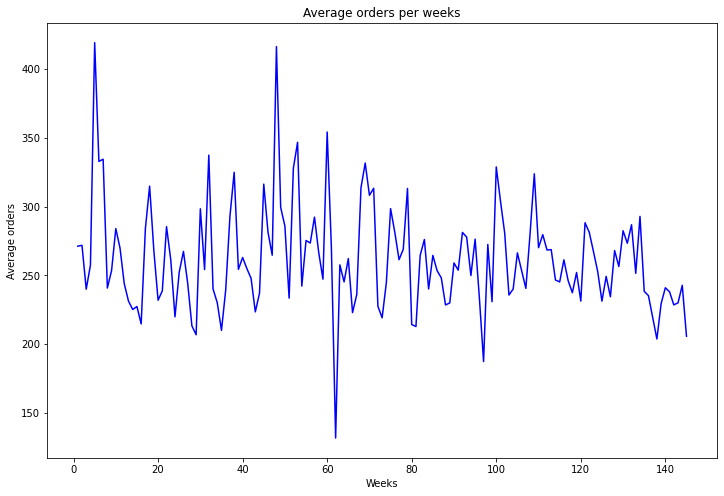

In [24]:
plt.figure(figsize=(12,8))
plt.plot(list(range(1,146)),mean_numorder,color="blue")
plt.xlabel("Weeks")
plt.ylabel("Average orders")
plt.title("Average orders per weeks")


Text(0.5, 1.0, 'Total orders per weeks')

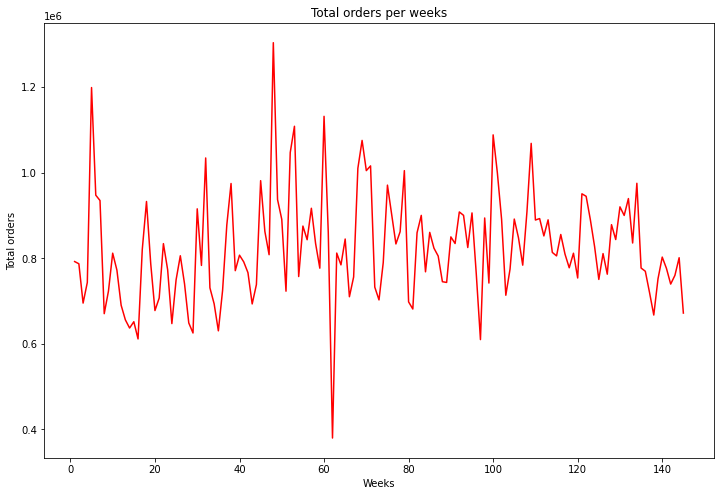

In [25]:
plt.figure(figsize=(12,8))
plt.plot(list(range(1,146)),total_order,color="red")
plt.xlabel("Weeks")
plt.ylabel("Total orders")
plt.title("Total orders per weeks")

In [26]:
dfGroupCenter= dfTrain.groupby(['center_id'])['num_orders'].sum()
dfGroupCenter = pd.DataFrame(dfGroupCenter)
dfGroupCenter.head()

,num_orders
center_id,
10,3381018
11,2797300
13,4296545
14,1195108
17,1218319


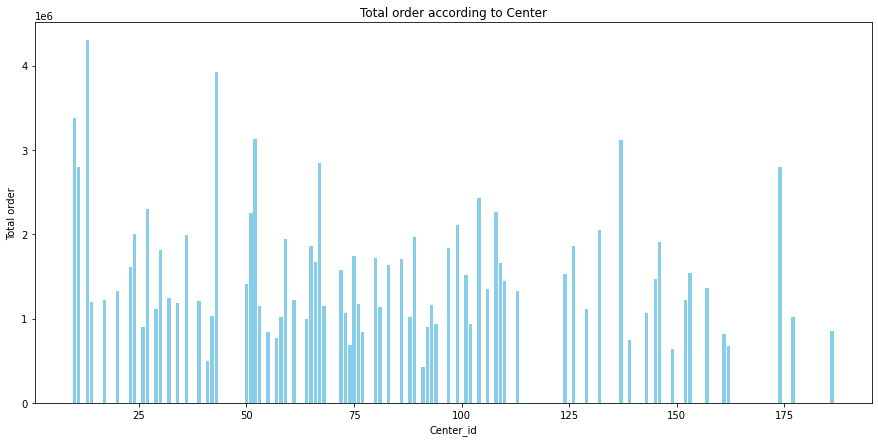

In [27]:
center_id=list(set(dfTrain['center_id']))
plt.figure(figsize = (15, 7)) 
plt.bar(center_id,dfGroupCenter['num_orders'] ,color ='skyblue',width = 0.8)   
plt.xlabel("Center_id") 
plt.ylabel("Total order") 
plt.title("Total order according to Center") 
plt.show() 

In [28]:
minCOrder=dfGroupCenter['num_orders'].idxmin(axis=0)
maxCOrder=dfGroupCenter['num_orders'].idxmax(axis=0)
print("The max order is from center having id: "+str(maxCOrder))
print("The min order is from center having id: "+str(minCOrder))

The max order is from center having id: 13
The min order is from center having id: 91


In [29]:
print("Max order reciving center detail:")
dfFulfilment.loc[(dfFulfilment['center_id'] == 13)]

Max order reciving center detail:


,center_id,city_code,region_code,center_type,op_area
1,13,590,56,TYPE_B,6.7


In [30]:
print("Min order reciving center detail:")
dfFulfilment.loc[(dfFulfilment['center_id'] == 91)]

Min order reciving center detail:


,center_id,city_code,region_code,center_type,op_area
30,91,590,56,TYPE_C,0.9


In [31]:
center_idL=dfTrain['center_id'].unique()
# print(len(center_idL))
Dict={}
for i in center_idL:
    Dict[i]=0;
# print(Dict)
for i in range(0,dfTrain.shape[0]):# Mapping center_id with total number of orders received
    c_id=dfTrain.loc[i,'center_id']
    sumOrder=dfTrain.loc[i,'num_orders']
    for key in Dict:
        if(key==c_id):
            Dict[c_id]=Dict[c_id]+sumOrder
            break
# print(Dict)

In [32]:
center_idL=[]#Store unique center_id
totalOrder=[]#Store total order of a center corresponding to center_id
for key in Dict:
    center_idL.append(key)
    totalOrder.append(Dict[key])
# for i in range(0,len(center_idL)):
#     print(str(center_idL[i])+"->"+str(totalOrder[i]))

In [33]:
dataCenter={'center_id':center_idL,'totalOrder':totalOrder}
dfGroupCenter=pd.DataFrame(dataCenter,index=[*range(0,len(center_idL),1)])
dfGroupCenter

,center_id,totalOrder
0,55,841246
1,24,1997535
2,11,2797300
3,83,1628964
4,32,1247195
...,...,...
72,23,1609906
73,86,1705643
74,68,1144901
75,51,2249169


In [34]:
# dfGroupCenter=pd.merge(dfGroupCenter,dfFulfilment['op_area'],on='center_id') #Error
dfGroupCenter = pd.merge(dfGroupCenter, dfFulfilment,how="left",left_on='center_id',right_on='center_id')
dfGroupCenter

,center_id,totalOrder,city_code,region_code,center_type,op_area
0,55,841246,647,56,TYPE_C,2.0
1,24,1997535,614,85,TYPE_B,3.6
2,11,2797300,679,56,TYPE_A,3.7
3,83,1628964,659,77,TYPE_A,5.3
4,32,1247195,526,34,TYPE_A,3.8
...,...,...,...,...,...,...
72,23,1609906,698,23,TYPE_A,3.4
73,86,1705643,699,85,TYPE_C,4.0
74,68,1144901,676,34,TYPE_B,4.1
75,51,2249169,638,56,TYPE_A,7.0


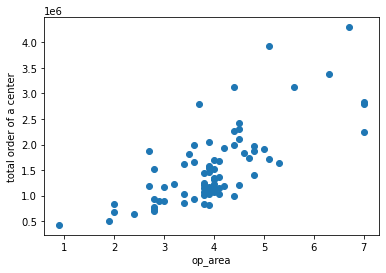

correlation between total order and op area:0.7279828065811329


In [35]:
# dfGroupCenter.plot(x='op_area_x',y='totalOrder')
plt.scatter(dfGroupCenter['op_area'],dfGroupCenter['totalOrder'])
plt.xlabel('op_area')
plt.ylabel('total order of a center')
plt.show()
print("correlation between total order and op area:"+str(dfGroupCenter['totalOrder'].corr(dfGroupCenter['op_area'])))

In [36]:
#Grouping data on the basis of cuisine
dfGroupMeal = X.groupby(['cuisine'])['num_orders'].sum()
dfGroupMeal = pd.DataFrame(dfGroupMeal)
dfGroupMeal=dfGroupMeal.reset_index()
dfGroupMeal

,cuisine,num_orders
0,Continental,16914439
1,Indian,25792544
2,Italian,44172832
3,Thai,32677670


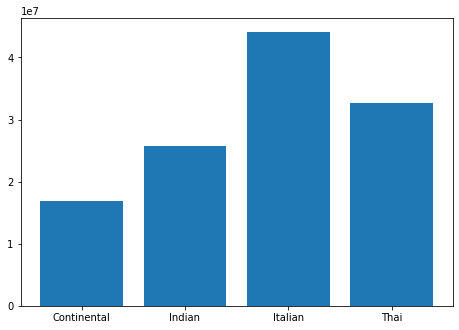

In [37]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dfGroupMeal['cuisine'],dfGroupMeal['num_orders'])
plt.show()


Italian cuisine had maximum number of orde

In [38]:
#Grouping data according to category and calculating number of orders according to category
dfGroupMeal = X.groupby(['category'])['num_orders'].sum()
dfGroupMeal = pd.DataFrame(dfGroupMeal)
dfGroupMeal=dfGroupMeal.reset_index()
dfGroupMeal

,category,num_orders
0,Beverages,40480525
1,Biryani,631848
2,Desert,1940754
3,Extras,3984979
4,Fish,871959
5,Other Snacks,4766293
6,Pasta,1637744
7,Pizza,7383720
8,Rice Bowl,20874063
9,Salad,10944336


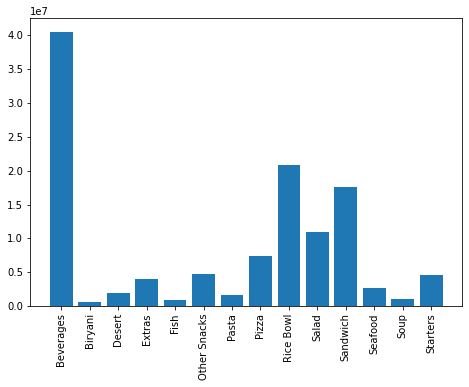

In [39]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dfGroupMeal['category'],dfGroupMeal['num_orders'])
plt.xticks(rotation=90)
plt.show()

Beverages had maximum order while Biryani had minimum orders

In [40]:
#Grouping dataset aaccording to category and cuisine and calculating total number of orders
dfGroupMeal = X.groupby(['category', 'cuisine'])['num_orders'].sum()
dfGroupMeal = pd.DataFrame(dfGroupMeal)
dfGroupMeal=dfGroupMeal.reset_index()
dfGroupMeal

,category,cuisine,num_orders
0,Beverages,Continental,5943046
1,Beverages,Indian,2345879
2,Beverages,Italian,13953970
3,Beverages,Thai,18237630
4,Biryani,Indian,631848
5,Desert,Indian,1940754
6,Extras,Thai,3984979
7,Fish,Continental,871959
8,Other Snacks,Thai,4766293
9,Pasta,Italian,1637744


In [41]:
#Creating a new feature by combining the existing feature 
dfGroupMeal['type'] = dfGroupMeal.apply(lambda x : x['category']+', '+x['cuisine'],axis=1)
dfGroupMeal.head()

,category,cuisine,num_orders,type
0,Beverages,Continental,5943046,"Beverages, Continental"
1,Beverages,Indian,2345879,"Beverages, Indian"
2,Beverages,Italian,13953970,"Beverages, Italian"
3,Beverages,Thai,18237630,"Beverages, Thai"
4,Biryani,Indian,631848,"Biryani, Indian"


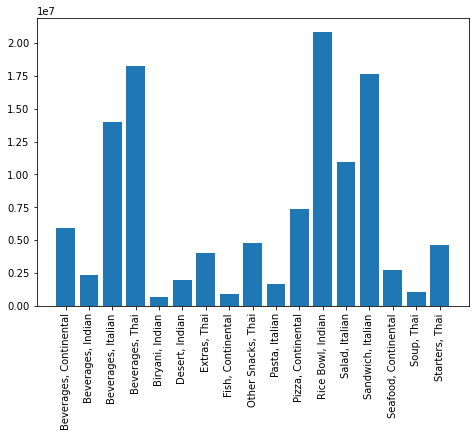

In [42]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
# plt.grid(True)
ax.bar(dfGroupMeal['type'],dfGroupMeal['num_orders'])
plt.xticks(rotation=90)
plt.show()

Indian Rice Bowl had maximum orders then Thai Beverages and Indian Biryani had least orders 

In [43]:
#Grouping dataset according to center type
dfGroupCenter = X.groupby(['center_type'])['num_orders'].sum()
dfGroupCenter = pd.DataFrame(dfGroupCenter)
dfGroupCenter = dfGroupCenter.reset_index()
dfGroupCenter

,center_type,num_orders
0,TYPE_A,68978517
1,TYPE_B,29996073
2,TYPE_C,20582895


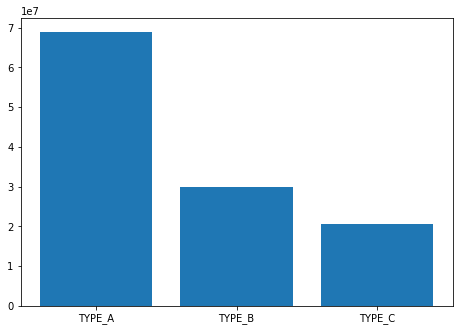

In [44]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dfGroupCenter['center_type'],dfGroupCenter['num_orders'])
plt.show()

typeA center receives more orders from typeB and typeC center.

In [45]:
dfGroupPromotion=X.groupby(['emailer_for_promotion'])['num_orders'].sum()
dfGroupPromotion = pd.DataFrame(dfGroupPromotion)
dfGroupPromotion = dfGroupPromotion.reset_index()
dfGroupPromotion

,emailer_for_promotion,num_orders
0,0,96175321
1,1,23382164


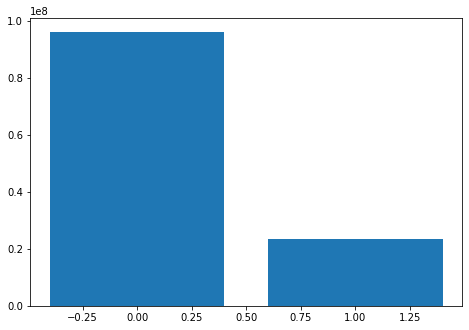

In [46]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dfGroupPromotion['emailer_for_promotion'],dfGroupPromotion['num_orders'])
plt.show()

In [47]:
dfGroupPromotion=X.groupby(['homepage_featured'])['num_orders'].sum()
dfGroupPromotion = pd.DataFrame(dfGroupPromotion)
dfGroupPromotion = dfGroupPromotion.reset_index()
dfGroupPromotion

,homepage_featured,num_orders
0,0,89899504
1,1,29657981


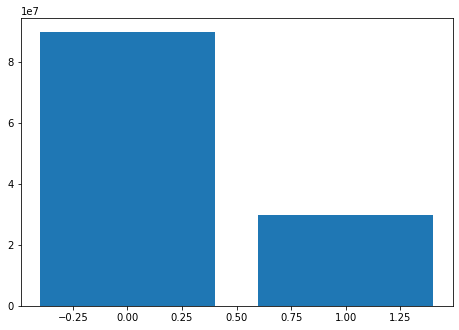

In [48]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dfGroupPromotion['homepage_featured'],dfGroupPromotion['num_orders'])
plt.show()

In [49]:
dfGroupCenter = X.groupby(['city_code', 'region_code'])['num_orders'].sum()
dfGroupCenter = pd.DataFrame(dfGroupCenter)
dfGroupCenter=dfGroupCenter.reset_index()
dfGroupCenter['city_region'] = dfGroupCenter.apply(lambda x : str(x['city_code'])+', '+str(x['region_code']),axis=1)
dfGroupCenter.head()

,city_code,region_code,num_orders,city_region
0,456,56,1937221,"456, 56"
1,461,34,1158164,"461, 34"
2,473,77,1214982,"473, 77"
3,478,77,637527,"478, 77"
4,485,77,1451046,"485, 77"


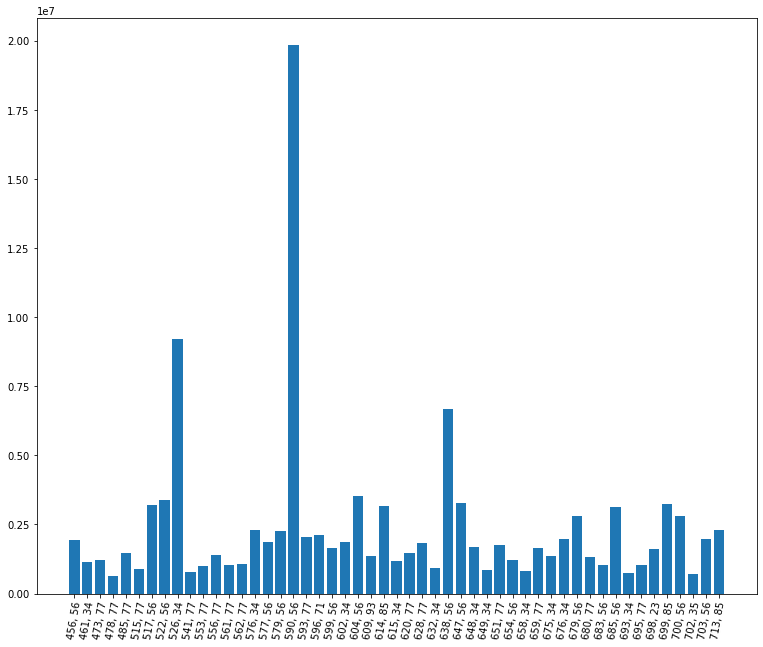

In [50]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(dfGroupCenter['city_region'],dfGroupCenter['num_orders'])
plt.xticks(rotation=80)
plt.show()

City with 590 code and region with 56 had maximum number of orders.

In [51]:
dfFulfilment.loc[(dfFulfilment['city_code'] == 590)]

,center_id,city_code,region_code,center_type,op_area
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
30,91,590,56,TYPE_C,0.9
36,43,590,56,TYPE_A,5.1
55,41,590,56,TYPE_C,1.9
56,10,590,56,TYPE_B,6.3
62,137,590,56,TYPE_A,4.4
63,153,590,56,TYPE_A,3.9
72,53,590,56,TYPE_A,3.8


In [52]:
op_areaMean=(6.7+4.0+0.9+5.1+1.9+6.3+4.4+3.9+3.8)/9
print(op_areaMean)

4.111111111111111


In [53]:
print("dfTrain shape: "+str(X.shape))
X.head()

dfTrain shape: (456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [54]:
#Merging test dataset with meal and fulfilment
dfTest=pd.read_csv('test.csv')
dfTest=pd.merge(dfTest,dfMeal[['meal_id','category','cuisine']],on='meal_id')
dfTest=pd.merge(dfTest,dfFulfilment[['center_id','city_code','region_code','center_type','op_area']],on='center_id')
print("dfTest shape: "+str(dfTest.shape))
dfTest.head()

dfTest shape: (32573, 14)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [55]:
#Creating new feature from existing features and dropping existing features
X['type'] = X.apply(lambda x : x['category']+', '+x['cuisine'],axis=1)
dfTest['type']=dfTest.apply(lambda x : x['category']+', '+x['cuisine'],axis=1)
X.drop(columns=['category','cuisine','city_code','region_code'],inplace=True)
dfTest.drop(columns=['category','cuisine','city_code','region_code'],inplace=True)

In [56]:
#dropping columns showing low correlation from target variable
X.drop(columns=['emailer_for_promotion','homepage_featured','id'],inplace=True)
dfTest.drop(columns=['emailer_for_promotion','homepage_featured','id'],inplace=True)

In [57]:
dfTest.head()

,week,center_id,meal_id,checkout_price,base_price,center_type,op_area,type
0,146,55,1885,158.11,159.11,TYPE_C,2.0,"Beverages, Thai"
1,147,55,1885,159.11,159.11,TYPE_C,2.0,"Beverages, Thai"
2,149,55,1885,157.14,158.14,TYPE_C,2.0,"Beverages, Thai"
3,150,55,1885,159.14,157.14,TYPE_C,2.0,"Beverages, Thai"
4,151,55,1885,160.11,159.11,TYPE_C,2.0,"Beverages, Thai"


In [58]:
X.head()

,week,center_id,meal_id,checkout_price,base_price,num_orders,center_type,op_area,type
0,1,55,1885,136.83,152.29,177,TYPE_C,2.0,"Beverages, Thai"
1,2,55,1885,135.83,152.29,323,TYPE_C,2.0,"Beverages, Thai"
2,3,55,1885,132.92,133.92,96,TYPE_C,2.0,"Beverages, Thai"
3,4,55,1885,135.86,134.86,163,TYPE_C,2.0,"Beverages, Thai"
4,5,55,1885,146.50,147.50,215,TYPE_C,2.0,"Beverages, Thai"


In [59]:
encoding=['center_id','meal_id','center_type','type']#columns needed for label encoding

In [60]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [61]:
#encoding categorical data
le=preprocessing.LabelEncoder()
for col in encoding:
    le.fit(X[col])
    X[col + '_encoded'] = le.transform(X[col])
    dfTest[col + '_encoded'] = le.transform(dfTest[col])

In [62]:
X.drop(columns=encoding,inplace=True)
dfTest.drop(columns=encoding,inplace=True)

In [63]:
X.head()

,week,checkout_price,base_price,num_orders,op_area,center_id_encoded,meal_id_encoded,center_type_encoded,type_encoded
0,1,136.83,152.29,177,2.0,23,22,2,3
1,2,135.83,152.29,323,2.0,23,22,2,3
2,3,132.92,133.92,96,2.0,23,22,2,3
3,4,135.86,134.86,163,2.0,23,22,2,3
4,5,146.50,147.50,215,2.0,23,22,2,3


In [64]:
dfTest.head()

,week,checkout_price,base_price,op_area,center_id_encoded,meal_id_encoded,center_type_encoded,type_encoded
0,146,158.11,159.11,2.0,23,22,2,3
1,147,159.11,159.11,2.0,23,22,2,3
2,149,157.14,158.14,2.0,23,22,2,3
3,150,159.14,157.14,2.0,23,22,2,3
4,151,160.11,159.11,2.0,23,22,2,3


In [65]:
y = np.log1p(X['num_orders'])
ynum=X['num_orders']

In [66]:
X.drop(columns=['num_orders'],inplace=True)
X.head()

,week,checkout_price,base_price,op_area,center_id_encoded,meal_id_encoded,center_type_encoded,type_encoded
0,1,136.83,152.29,2.0,23,22,2,3
1,2,135.83,152.29,2.0,23,22,2,3
2,3,132.92,133.92,2.0,23,22,2,3
3,4,135.86,134.86,2.0,23,22,2,3
4,5,146.50,147.50,2.0,23,22,2,3


In [67]:
#Spliting data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(442851, 8) (13697, 8) (442851,) (13697,)


In [68]:
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb

In [69]:
hyper_params = {
    'learning_rate': 0.005,
    "max_depth": 8,
    "num_leaves": 128,  
    "n_estimators": 1000
}

In [70]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [71]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

[1]	valid_0's l1: 0.996545	valid_0's l2: 1.44712
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's l1: 0.992969	valid_0's l2: 1.43737
[3]	valid_0's l1: 0.989414	valid_0's l2: 1.42772
[4]	valid_0's l1: 0.985869	valid_0's l2: 1.41815
[5]	valid_0's l1: 0.982359	valid_0's l2: 1.40868
[6]	valid_0's l1: 0.978867	valid_0's l2: 1.3993
[7]	valid_0's l1: 0.975402	valid_0's l2: 1.39001
[8]	valid_0's l1: 0.971969	valid_0's l2: 1.38082
[9]	valid_0's l1: 0.968555	valid_0's l2: 1.37173
[10]	valid_0's l1: 0.965173	valid_0's l2: 1.36272
[11]	valid_0's l1: 0.961806	valid_0's l2: 1.3538
[12]	valid_0's l1: 0.958468	valid_0's l2: 1.34497
[13]	valid_0's l1: 0.955157	valid_0's l2: 1.33627
[14]	valid_0's l1: 0.951873	valid_0's l2: 1.32761
[15]	valid_0's l1: 0.948611	valid_0's l2: 1.31906
[16]	valid_0's l1: 0.945369	valid_0's l2: 1.31057
[17]	valid_0's l1: 0.942159	valid_0's l2: 1.30219
[18]	valid_0's l1: 0.93896	valid_0's l2: 1.29387
[19]	valid_0's l1: 0.935789	valid_0's l2: 1.28565

[164]	valid_0's l1: 0.644785	valid_0's l2: 0.641864
[165]	valid_0's l1: 0.643672	valid_0's l2: 0.639793
[166]	valid_0's l1: 0.642536	valid_0's l2: 0.637687
[167]	valid_0's l1: 0.641389	valid_0's l2: 0.635536
[168]	valid_0's l1: 0.6403	valid_0's l2: 0.633518
[169]	valid_0's l1: 0.639174	valid_0's l2: 0.631414
[170]	valid_0's l1: 0.638074	valid_0's l2: 0.62938
[171]	valid_0's l1: 0.636961	valid_0's l2: 0.627306
[172]	valid_0's l1: 0.635909	valid_0's l2: 0.625356
[173]	valid_0's l1: 0.634814	valid_0's l2: 0.623326
[174]	valid_0's l1: 0.633753	valid_0's l2: 0.621372
[175]	valid_0's l1: 0.632669	valid_0's l2: 0.619364
[176]	valid_0's l1: 0.631637	valid_0's l2: 0.617467
[177]	valid_0's l1: 0.630586	valid_0's l2: 0.615544
[178]	valid_0's l1: 0.629556	valid_0's l2: 0.613642
[179]	valid_0's l1: 0.628551	valid_0's l2: 0.611806
[180]	valid_0's l1: 0.627532	valid_0's l2: 0.609927
[181]	valid_0's l1: 0.626506	valid_0's l2: 0.608066
[182]	valid_0's l1: 0.625486	valid_0's l2: 0.606184
[183]	valid_0's

[324]	valid_0's l1: 0.533157	valid_0's l2: 0.449518
[325]	valid_0's l1: 0.532777	valid_0's l2: 0.448934
[326]	valid_0's l1: 0.532413	valid_0's l2: 0.448378
[327]	valid_0's l1: 0.532048	valid_0's l2: 0.447832
[328]	valid_0's l1: 0.531651	valid_0's l2: 0.447213
[329]	valid_0's l1: 0.531287	valid_0's l2: 0.44666
[330]	valid_0's l1: 0.530902	valid_0's l2: 0.446062
[331]	valid_0's l1: 0.530552	valid_0's l2: 0.445527
[332]	valid_0's l1: 0.53017	valid_0's l2: 0.444932
[333]	valid_0's l1: 0.529801	valid_0's l2: 0.444375
[334]	valid_0's l1: 0.529425	valid_0's l2: 0.443791
[335]	valid_0's l1: 0.529067	valid_0's l2: 0.443242
[336]	valid_0's l1: 0.528702	valid_0's l2: 0.442674
[337]	valid_0's l1: 0.528365	valid_0's l2: 0.442162
[338]	valid_0's l1: 0.527983	valid_0's l2: 0.441569
[339]	valid_0's l1: 0.527605	valid_0's l2: 0.44097
[340]	valid_0's l1: 0.527256	valid_0's l2: 0.440424
[341]	valid_0's l1: 0.526895	valid_0's l2: 0.439857
[342]	valid_0's l1: 0.52652	valid_0's l2: 0.439283
[343]	valid_0's 

[484]	valid_0's l1: 0.485108	valid_0's l2: 0.376848
[485]	valid_0's l1: 0.484884	valid_0's l2: 0.376536
[486]	valid_0's l1: 0.484682	valid_0's l2: 0.376241
[487]	valid_0's l1: 0.484471	valid_0's l2: 0.37595
[488]	valid_0's l1: 0.484265	valid_0's l2: 0.375662
[489]	valid_0's l1: 0.484048	valid_0's l2: 0.375352
[490]	valid_0's l1: 0.483851	valid_0's l2: 0.375064
[491]	valid_0's l1: 0.483638	valid_0's l2: 0.374771
[492]	valid_0's l1: 0.483443	valid_0's l2: 0.374497
[493]	valid_0's l1: 0.483234	valid_0's l2: 0.374206
[494]	valid_0's l1: 0.483032	valid_0's l2: 0.373918
[495]	valid_0's l1: 0.482836	valid_0's l2: 0.373635
[496]	valid_0's l1: 0.482637	valid_0's l2: 0.373359
[497]	valid_0's l1: 0.482428	valid_0's l2: 0.373062
[498]	valid_0's l1: 0.482236	valid_0's l2: 0.372783
[499]	valid_0's l1: 0.482034	valid_0's l2: 0.372499
[500]	valid_0's l1: 0.481835	valid_0's l2: 0.372224
[501]	valid_0's l1: 0.481644	valid_0's l2: 0.371952
[502]	valid_0's l1: 0.481465	valid_0's l2: 0.371696
[503]	valid_0

[646]	valid_0's l1: 0.459456	valid_0's l2: 0.340958
[647]	valid_0's l1: 0.459357	valid_0's l2: 0.340823
[648]	valid_0's l1: 0.459209	valid_0's l2: 0.340617
[649]	valid_0's l1: 0.459078	valid_0's l2: 0.340453
[650]	valid_0's l1: 0.458959	valid_0's l2: 0.340285
[651]	valid_0's l1: 0.458835	valid_0's l2: 0.340126
[652]	valid_0's l1: 0.458694	valid_0's l2: 0.339926
[653]	valid_0's l1: 0.458567	valid_0's l2: 0.339768
[654]	valid_0's l1: 0.458463	valid_0's l2: 0.339631
[655]	valid_0's l1: 0.458343	valid_0's l2: 0.339462
[656]	valid_0's l1: 0.458218	valid_0's l2: 0.339307
[657]	valid_0's l1: 0.458111	valid_0's l2: 0.339161
[658]	valid_0's l1: 0.45802	valid_0's l2: 0.339039
[659]	valid_0's l1: 0.45788	valid_0's l2: 0.338842
[660]	valid_0's l1: 0.457774	valid_0's l2: 0.338704
[661]	valid_0's l1: 0.457635	valid_0's l2: 0.338508
[662]	valid_0's l1: 0.457512	valid_0's l2: 0.338356
[663]	valid_0's l1: 0.457422	valid_0's l2: 0.338235
[664]	valid_0's l1: 0.457306	valid_0's l2: 0.338075
[665]	valid_0'

[808]	valid_0's l1: 0.44425	valid_0's l2: 0.320846
[809]	valid_0's l1: 0.44419	valid_0's l2: 0.320765
[810]	valid_0's l1: 0.444127	valid_0's l2: 0.320689
[811]	valid_0's l1: 0.444064	valid_0's l2: 0.320598
[812]	valid_0's l1: 0.443986	valid_0's l2: 0.320491
[813]	valid_0's l1: 0.443911	valid_0's l2: 0.320397
[814]	valid_0's l1: 0.443851	valid_0's l2: 0.320324
[815]	valid_0's l1: 0.443777	valid_0's l2: 0.320221
[816]	valid_0's l1: 0.443713	valid_0's l2: 0.320142
[817]	valid_0's l1: 0.443619	valid_0's l2: 0.320011
[818]	valid_0's l1: 0.443556	valid_0's l2: 0.319921
[819]	valid_0's l1: 0.443479	valid_0's l2: 0.319829
[820]	valid_0's l1: 0.443412	valid_0's l2: 0.319735
[821]	valid_0's l1: 0.44334	valid_0's l2: 0.319645
[822]	valid_0's l1: 0.443278	valid_0's l2: 0.319569
[823]	valid_0's l1: 0.443216	valid_0's l2: 0.31948
[824]	valid_0's l1: 0.443145	valid_0's l2: 0.319384
[825]	valid_0's l1: 0.443087	valid_0's l2: 0.319312
[826]	valid_0's l1: 0.443025	valid_0's l2: 0.319237
[827]	valid_0's 

[967]	valid_0's l1: 0.434469	valid_0's l2: 0.307933
[968]	valid_0's l1: 0.434423	valid_0's l2: 0.307871
[969]	valid_0's l1: 0.434362	valid_0's l2: 0.307794
[970]	valid_0's l1: 0.434311	valid_0's l2: 0.307725
[971]	valid_0's l1: 0.434255	valid_0's l2: 0.307649
[972]	valid_0's l1: 0.434202	valid_0's l2: 0.307582
[973]	valid_0's l1: 0.434155	valid_0's l2: 0.307515
[974]	valid_0's l1: 0.434108	valid_0's l2: 0.30745
[975]	valid_0's l1: 0.434062	valid_0's l2: 0.307393
[976]	valid_0's l1: 0.433997	valid_0's l2: 0.307306
[977]	valid_0's l1: 0.433943	valid_0's l2: 0.307234
[978]	valid_0's l1: 0.433879	valid_0's l2: 0.307154
[979]	valid_0's l1: 0.433819	valid_0's l2: 0.307072
[980]	valid_0's l1: 0.433772	valid_0's l2: 0.307007
[981]	valid_0's l1: 0.433719	valid_0's l2: 0.306941
[982]	valid_0's l1: 0.43367	valid_0's l2: 0.306875
[983]	valid_0's l1: 0.433607	valid_0's l2: 0.306789
[984]	valid_0's l1: 0.43355	valid_0's l2: 0.306717
[985]	valid_0's l1: 0.433505	valid_0's l2: 0.306656
[986]	valid_0's

LGBMRegressor(learning_rate=0.005, max_depth=8, n_estimators=1000,
              num_leaves=128)

In [72]:
#Making predictions on y-test
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [73]:
# Basic RMSE
# print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_test) ** 0.5, 5))
print('The rmse of prediction is:', round(mean_squared_log_error(np.expm1(y_pred),np.expm1( y_test)) ** 0.5, 5))

The rmse of prediction is: 0.55286


In [74]:
from sklearn.metrics import mean_squared_log_error

In [75]:
# error = 100*(np.sqrt(mean_squared_log_error(y_test, y_pred)))
error = 100*(np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))))

In [76]:
print(error)

55.285791411455335


In [77]:
yTestPred=gbm.predict(dfTest, num_iteration=gbm.best_iteration_)
yTestPred=np.expm1(yTestPred)

In [78]:
dfSubmission1 = pd.DataFrame({'num_orders':yTestPred})
dfSubmission1.head()

,num_orders
0,173.636789
1,173.636789
2,173.636789
3,173.636789
4,173.636789


In [79]:
dfSubmission1.to_csv('submission1.csv', index=False)

In [80]:
from sklearn import datasets, ensemble

In [81]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [82]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [90]:
y_pred1=reg.predict(X_test)

In [91]:
error1 = 100*(np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred1))))
print(error1)

68.46595060054914


In [92]:
yTestpred1 = reg.predict(dfTest)
yTestpred1 = np.expm1(yTestpred1)

In [93]:
dfSubmission2 = pd.DataFrame({'num_orders':yTestPred})
dfSubmission2.head()

,num_orders
0,173.636789
1,173.636789
2,173.636789
3,173.636789
4,173.636789


In [94]:
dfSubmission2.to_csv('submission2.csv', index=False)